# **2D Classification pipeline**
___  
  
In this notebook we show how to apply a [BiaPy](https://biapy.readthedocs.io/en/latest/) pipeline for **2D classification** of [Butterfly](https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification) data.

<figure>
<center>
<img src='https://raw.githubusercontent.com/BiaPyX/BiaPy-doc/master/source/img/classification/butterfly_1.jpg' width='100px'/>
<img src='https://raw.githubusercontent.com/BiaPyX/BiaPy-doc/master/source/img/classification/butterfly_2.jpg' width='100px'/>
<img src='https://raw.githubusercontent.com/BiaPyX/BiaPy-doc/master/source/img/classification/butterfly_3.jpg' width='100px'/>
<img src='https://raw.githubusercontent.com/BiaPyX/BiaPy-doc/master/source/img/classification/butterfly_4.jpg' width='100px'/>
<img src='https://raw.githubusercontent.com/BiaPyX/BiaPy-doc/master/source/img/classification/butterfly_5.jpg' width='100px'/>

<figcaption><b>Figure 1</b>: Example of a 2D classification problem. These examples belong to various classes and were sourced from  <a href="https://www.kaggle.com/">  Kaggle</a>, specifically from the Butterfly Image Classification dataset which is a large collection of different butterfly images .</figcaption></center>
</figure>

Without any coding, we'll guide you step-by-step through the process to:
1. **Upload a set of training and test images** along with their corresponding instance label images.
2. **Train a Deep Neural Network (DNN)** model using the training set.
3. **Apply the model** to the test images.
4. **Download the segmentation results** to your local machine.

**Disclaimer:** The structure of the notebook is heavily inspired by the fantastic [ZeroCostDL4Mic notebooks](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki).


**Contact:** This notebook was created by [Ignacio Arganda-Carreras](mailto:ignacio.arganda@ehu.eus) and [Daniel Franco-Barranco](mailto:daniel.franco@dipc.org). For suggestions, comments, or issues, please reach out to us via email or [create an issue in BiaPy's repository](https://github.com/BiaPyX/BiaPy/issues). Thank you!

## **Expected Inputs and Outputs**
___

### **Inputs**

This notebook expects the following folders as input:

1. **Training Raw Images**: Contains the raw 2D images used for training the model.
2. **Test Raw Images**: Houses the raw 2D images for testing the model.
3. **Output Folder**: A designated path where the classification results will be saved.

### **Outputs**

Upon successful execution, a new folder will be generated, housing the classification results. The results will be saved in a CSV file, which can be easily downloaded at the end of this notebook.

<font color='red'><b>Note:</b></font> For testing purposes, you can utilize the **example datasets provided under 'Manage File(s) Source > Option 3'**.

**Data structure**

Input images are expected to be separated into different folders, which correspond to their classification label. Each image label is obtained from the directory name in which that image resides. That is why is so important to follow the directory tree as described below. If you have a .csv file with each image label, as is provided by <a class="reference external" href="https://medmnist.com/">MedMNIST v2</a>, you can use our script <a class="reference external" href="https://github.com/BiaPyX/BiaPy/blob/master/biapy/utils/scripts/from_class_csv_to_folders.py">from_class_csv_to_folders.py</a> to create the directory tree as below:
```
dataset/
├── train
│   ├── 0
│   │   ├── train0_0.png
│   │   ├── train1013_0.png
│   │   ├── . . .
│   │   └── train932_0.png
│   ├── 1
│   │   ├── train104_1.png
│   │   ├── train1049_1.png
│   │   ├── . . .
│   │   └── train964_1.png
| . . .
│   └── 6
│       ├── train1105_6.png
│       ├── train1148_6.png
│       ├── . . .
│       └── train98_6.png
└── test
    ├── 0
    │   ├── test1008_0.png
    │   ├── test1084_0.png
    │   ├── . . .
    │   └── test914_0.png
    ├── 1
    │   ├── test10_1.png
    │   ├── test1034_1.png
    │   ├── . . .
    │   └── test984_1.png
  . . .
    └── 6
        ├── test1021_6.png
        ├── test1069_6.png
        ├── . . .
        └── test806_6.png
```

Here each directory is a number but it can be any string. Notice that they will be considered the class names. Regarding the test, if you have no classes it doesn’t matter if the images are separated in several folders or are all in one folder. But, if `DATA.TEST.LOAD_GT` is enabled, each folder in test path (i.e. ```DATA.TEST.PATH```) will be considered as a class (as done for training and validation).

**Input Format Support**

This notebook is compatible with a range of input formats. You can use the following file extensions: `.tif`, `.png`, `.jpg`, `.npy`, `.h5`, `.hdf5` (every extension supported by [scikit-image](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread)).

## **Prepare the environment**
___

Establish connection with Google services. You **must be logged in to Google** to continue.
Since this is not Google's own code, you will probably see a message warning you of the dangers of running unfamiliar code. This is completely normal.


## **Check for GPU Access**
---

By default, the session is configured to use Python 3 with GPU acceleration. However, it's a good practice to double-check these settings:

1. Navigate to **Runtime** in the top menu and select **Change the Runtime type**.
2. Ensure the following settings:
   - **Runtime type:** Python 3 (This program is written in the Python 3 programming language.)
   - **Accelerator:** GPU (Graphics Processing Unit)

This will ensure that you're using Python 3 and taking advantage of GPU acceleration.

## **Manage File(s) Source**
---

The input folder can be provided using three different options:
1. **Direct Upload**: Directly upload the desired folder.
2. **Google Drive**: Use a folder stored in your Google Drive.
3. **Sample Data**: Use a sample dataset provided by us.

The steps you'll need to follow vary depending on your chosen option. These steps are detailed in the subsequent sections.

### **Option 1: Upload Local Files to the Notebook**
---

To use this option, you will be prompted to upload your files to Colab. The uploaded files will be stored in the `/content/input/` directory. Ensure that you upload a ZIP file that contains the 'train', 'val' (if applicable), and 'test' folders.

In [ ]:
#@markdown ##Play the cell to upload local files (train raw images)
from google.colab import files
!mkdir -p /content/input/train
%cd /content/input/train
uploaded = files.upload()
%cd /content

In [ ]:
# @title  { display-mode: "form" }
# @title  { display-mode: "code" }
#@markdown ##Play the cell to upload local files (test raw images)

from google.colab import files
!mkdir -p /content/input/test
%cd /content/input/test
uploaded = files.upload()
%cd /content

### **Option 2: Mount Your Google Drive**
---

If you wish to use this notebook with data from your Google Drive, you'll first need to mount the drive to this notebook.

Execute the cell below to initiate the Google Drive mounting process. A link will be displayed click on it. In the new browser window that opens, choose your drive and click 'Allow'. Copy the code that appears, return to this notebook, paste the code into the cell, and press 'Enter'. This action grants Colab access to your Google Drive data.

After this process, you can access your data via the **Files** tab, located on the top left of this notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

### **Option 3: Download an Example Dataset**
---
Don't have data readily available but still want to test the notebook? No problem! Simply execute the following cell to download a sample dataset.

Specifically, we'll use the [Butterfly](https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification) dataset,which is publicly available online.


In [ ]:
#@markdown ##Play to download an example dataset

import os

!pip install gdown==4.7.3 --quiet
import gdown

os.chdir('/content/')
gdown.download("https://drive.google.com/uc?id=1L042gkh5tjsZAqz2ipFxwF-8DpoQEXSI", "data.zip", quiet=True)

!unzip -q data.zip
!rm data.zip

print('Dataset downloaded and unzipped under /content/data')


Dataset downloaded and unzipped under /content/data


## **Paths for Input Images and Output Files**
___

Depending on the option you chose for managing file sources, you'll set your paths differently:

- **Option 1 (Upload from Local Machine)**:
  - Set `train_data_path` to `/content/input/train`
  - Set `test_data_path` to `/content/input/test`
  - Set `output_path` to `/content/out`
  
  
- **Option 2 (Use Google Drive Data)**:
  - Insert the paths to your input files and your desired output directory here, i.e., `/content/gdrive/MyDrive/...`.
  
- **Option 3 (Use Our Sample Data)**:
  - Set `train_data_path` to `/content/data/train`
  - Set `test_data_path` to `/content/data/test`
  - Set `output_path` to `/content/out`
  

  **Note**: Ensure you download your results from the `/content/out` directory after the process!

**Helpful Tip**: If you're unsure about the paths to your folders, look at the top left of this notebook for a small folder icon. Navigate through the directories until you locate your desired folder. Right-click on it and select "Copy Path" to copy the folder's path.

In [ ]:
#@markdown #####Path to train images
train_data_path = '/content/data/train' #@param {type:"string"}
#@markdown #####Path to test images
test_data_path = '/content/data/test' #@param {type:"string"}
#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/output' #@param {type:"string"}

## **Install BiaPy library**


In [ ]:
#@markdown ##Play to install BiaPy and its dependences

import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
import ipywidgets as widgets
from ipywidgets import Output

!pip install biapy==3.3.2

from biapy import BiaPy

changed_source = False

Cloning into 'BiaPy'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 158 (delta 41), reused 61 (delta 14), pack-reused 0
Receiving objects: 100% (158/158), 36.14 MiB | 20.61 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Obtaining file:///content/BiaPy
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

## **Configure and train the DNN model**
[BiaPy](https://biapy.readthedocs.io/en/latest/) contains a few deep learning models to perform classification.

The selection of the model and the pipeline hyperparameters can be configured by editing the YAML configuration file or (easier) by running the next cell.



In [ ]:
#@markdown ###Play to select the source to build the model (BiaPy, Torchvision or BioImage Model Zoo) { run: "auto", vertical-output: true, display-mode: "form" }
changed_source = True
exists_tv = False
exists_bmz = False
# create widgets
source = widgets.ToggleButtons(
    options=['BiaPy', 'Torchvision', 'BioImage Model Zoo'],
    description='Source:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Models created during this workflow', 'Torchvision model', 'BioImage Model Zoo model'],
#     icons=['check'] * 3
)

t_vision = widgets.Dropdown(
    options=['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161',
             'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 
             'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 
             'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 
             'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small',  'quantized_googlenet', 'quantized_inception_v3', 
             'quantized_mobilenet_v2', 'quantized_mobilenet_v3_large', 'quantized_resnet18', 'quantized_resnet50', 
             'quantized_resnext101_32x8d', 'quantized_resnext101_64x4d', 'quantized_shufflenet_v2_x0_5', 'quantized_shufflenet_v2_x1_0', 
             'quantized_shufflenet_v2_x1_5', 'quantized_shufflenet_v2_x2_0', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 
             'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 
             'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 
             'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'retinanet_resnet50_fpn', 
             'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 
             'squeezenet1_0', 'squeezenet1_1', 'swin_b', 'swin_s', 'swin_t', 'swin_v2_b', 'swin_v2_s', 'swin_v2_t', 
             'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'vit_b_16', 'vit_b_32', 
             'vit_h_14', 'vit_l_16', 'vit_l_32', 'wide_resnet101_2', 'wide_resnet50_2'],
    value='alexnet',
    description='Supported:',
    disabled=False,
)

bmz = widgets.Text(
    # value='10.5281/zenodo.5764892',
    placeholder='DOI of BMZ model',
    description='DOI:',
    disabled=False
)

# display the first widget
display(source)

# intialize the output - second widget
out = Output()

def changed(change):
    '''
    Monitor change in the first widget
    '''
    global out
    global exists_bmz
    global exists_tv
    if source.value == 'BiaPy':
        bmz.layout.display = 'none'
        t_vision.layout.display = 'none'
        out.clear_output() #clear output
        out = Output() # redefine output
    else:
        if source.value == 'Torchvision':
          bmz.layout.display = 'none'
          t_vision.layout.display = 'none'
          t_vision.layout.display = 'flex'
          if not exists_tv:
            out.append_display_data(t_vision)
            display(out)
          exists_tv = True
        else:
          t_vision.layout.display = 'none'
          bmz.layout.display = 'none'
          bmz.layout.display = 'flex'
          if not exists_bmz:
            out.append_display_data(bmz)
            display(out)
          exists_bmz = True

# monitor the source widget for changes
source.observe(changed, 'value')

ToggleButtons(description='Source:', options=('BiaPy', 'Torchvision', 'BioImage Model Zoo'), tooltips=('Models…

### **Select your parameters**
---
#### **Name of the model**
* **`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

#### **Data management**

* **`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10**

* **`test_ground_truth`:** Select to use test data folder order as the ground truth class to measure the performance of the model's result. **Default value: True**

#### **Basic training parameters**
* **`number_of_classes`:** Input number of classes present in the problem. It must be equal to the number of subfolders in training and validation (if not extracted from train) folders.

* **`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. For the example dataset, reasonable results can already be observed after 100 epochs. **Default value: 100**

* **`patience`:**  Input how many epochs you want to wait without the model improving its results in the validation set to stop training. **Default value: 20**

#### **Advanced Parameters - experienced users only**
* **`model_architecture`:**  Select the architecture of the DNN used as backbone of the pipeline. Options: ViT, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7 and simple CNN. **Default value: ViT**

* **`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 12**

* **`patch_size`:** Input the size of the patches use to train your model (length in pixels in X and Y). The value should be smaller or equal to the dimensions of the image. **Default value: 100**

* **`input_channels`:** Input the number of channels of your images (grayscale = 1, RGB = 3). **Default value: 3**

* **`optimizer`:** Select the optimizer used to train your model. Options: ADAM, ADAMW, Stochastic Gradient Descent (SGD). ADAM usually converges faster, while ADAMW provides a balance between fast convergence and better handling of weight decay regularization. SGD is known for better generalization.**Default value: ADAMW**

* **`initial_learning_rate`:** Input the initial value to be used as learning rate. If you select ADAM or ADAMW as optimizer, this value should be around 10e-4. **Default value: 0.0001**

In [ ]:
###Name of the model:
model_name = "my_2d_classification_butterfly" #@param {type:"string"}

### Data management:
percentage_validation =  10 #@param {type:"number"}
test_ground_truth = True #@param {type:"boolean"}

### Basic training parameters:
number_of_classes = 75#@param {type:"number"}
number_of_epochs =  100 #@param {type:"number"}
patience =  20 # @param {type:"number"}

### Advanced training parameters:

model_architecture = "ViT" #@param ["ViT", "EfficientNetB0", "EfficientNetB1", "EfficientNetB2", "EfficientNetB3", "EfficientNetB4", "EfficientNetB5", "EfficientNetB6", "EfficientNetB7", "simple_cnn"]

batch_size =  32#@param {type:"number"}
patch_size = 100 #@param {type:"number"}

input_channels = 3 #@param {type:"number"}

optimizer = "ADAMW" #@param ["ADAM", "SGD","ADAMW"]
initial_learning_rate = 0.0001 #@param {type:"number"}

checkpoint_path = ''


In [ ]:
#@markdown ##OPTIONAL: Play the cell to upload initial model weights
#@markdown Use this option to start the training from a **pre-trained model** if you have one. Otherwise, skip this cell.

#@markdown **Important**: remember the weights must correspond to the selected architecture, patch size and number of input channels. Otherwise, an error will be shown when training.
from google.colab import files

#s.chdir('/content/')

uploaded = files.upload()

checkpoint_path = '/content/' + list(uploaded.keys())[0]

# open previously configured file, if exists
job_name = model_name
yaml_file = "/content/"+str(job_name)+".yaml"

# edit previous configuration file if it exists to load the checkpoint model
if os.path.exists( yaml_file ):
    import yaml
    with open( yaml_file, 'r') as stream:
        try:
            biapy_config = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    biapy_config['PATHS'] = {}
    biapy_config['PATHS']['CHECKPOINT_FILE'] = checkpoint_path
    biapy_config['MODEL'] = {}
    biapy_config['MODEL']['LOAD_CHECKPOINT'] = True

    # save file
    with open( yaml_file, 'w') as outfile:
        yaml.dump(biapy_config, outfile, default_flow_style=False)

print( "Pre-trained model loaded and ready to re-train.")

In [ ]:
#@markdown ##Play to download the YAML configuration file and update it to train the model
import errno

os.chdir('/content/')

job_name = model_name
yaml_file = "/content/"+str(job_name)+".yaml"

# remove previous configuration file if it exists with the same name
if os.path.exists( yaml_file ):
    os.remove( yaml_file )

# remove template file it is exists
template_file = '2d_classification.yaml'
if os.path.exists( template_file ):
    os.remove( template_file )

# Download template file
!wget https://raw.githubusercontent.com/BiaPyX/BiaPy/master/templates/classification/2d_classification.yaml &> /dev/null

# Check folders before modifying the .yaml file
if not os.path.exists(train_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), train_data_path)
ids = sorted(next(os.walk(train_data_path))[1])
if len(ids) == 0:
    raise ValueError("No folders found in dir {}".format(train_data_path))

if not os.path.exists(test_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), test_data_path)
ids = sorted(next(os.walk(test_data_path))[1])
if len(ids) == 0:
    raise ValueError("No folders found in dir {}".format(test_data_path))


# open template configuration file
import yaml
with open( template_file, 'r') as stream:
    try:
        biapy_config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# update paths to data
#DATA.NORMALIZATION.TYPE
biapy_config['DATA']['TRAIN']['PATH'] = train_data_path
biapy_config['DATA']['TEST']['PATH'] = test_data_path
biapy_config['DATA']['TEST']['LOAD_GT'] = test_ground_truth

# update data patch size
biapy_config['DATA']['PATCH_SIZE'] = '('+str(patch_size)+', '+ str(patch_size)+', ' + str(input_channels)+')'
# adjust test padding accordingly
padding = patch_size // 8
biapy_config['DATA']['TEST']['PADDING'] = '('+str(padding)+', '+ str(padding)+')'

# update training parameters
biapy_config['DATA']['VAL']['FROM_TRAIN'] = True
biapy_config['DATA']['VAL']['SPLIT_TRAIN'] = percentage_validation/100.0
biapy_config['TRAIN']['EPOCHS'] = number_of_epochs
biapy_config['TRAIN']['PATIENCE'] = patience
biapy_config['TRAIN']['BATCH_SIZE'] = batch_size
biapy_config['TRAIN']['OPTIMIZER'] = optimizer
biapy_config['TRAIN']['LR'] = initial_learning_rate

# change source to build model - biapy, torchvision or bmz
if changed_source:
    if source.value == "BiaPy":
        biapy_config['MODEL']['SOURCE'] = "biapy"
    elif source.value == 'Torchvision':
        biapy_config['MODEL']['SOURCE'] = "torchvision"
        biapy_config['MODEL']['TORCHVISION_MODEL_NAME'] = t_vision.value
    elif source.value == 'BioImage Model Zoo':
        biapy_config['MODEL']['SOURCE'] = "bmz"
        biapy_config['MODEL']['BMZ'] = {}
        biapy_config['MODEL']['BMZ']['SOURCE_MODEL_DOI'] = bmz.value
else:
    biapy_config['MODEL']['SOURCE'] = "biapy"


# Transcribe model architecture
# Available models: "ViT", "EfficientNetB0", "EfficientNetB1", "EfficientNetB2",
# "EfficientNetB3", "EfficientNetB4", "EfficientNetB5", "EfficientNetB6",
#  "EfficientNetB7", "simple_cnn"
architecture = "simple_cnn"
if model_architecture == "simple_cnn":
    architecture = 'simple_cnn'
elif model_architecture == "ViT":
    architecture = 'ViT'
elif "EfficientNet" in model_architecture:
    architecture = model_architecture.replace("B", "_b").lower()
biapy_config['MODEL']['N_CLASSES'] = number_of_classes
biapy_config['MODEL']['ARCHITECTURE'] = architecture

# model weights
if checkpoint_path != '':
    biapy_config['PATHS'] = {}
    biapy_config['PATHS']['CHECKPOINT_FILE'] = checkpoint_path
    biapy_config['MODEL'] = {}
    biapy_config['MODEL']['LOAD_CHECKPOINT'] = True


# save file
with open( yaml_file, 'w') as outfile:
    yaml.dump(biapy_config, outfile, default_flow_style=False)

print( "Training configuration finished.")

Training configuration finished.


### **Train the model**
---

In [ ]:
#@markdown ##Play to train the model

import os
import errno

# Run the code
biapy = BiaPy(f'/content/{job_name}.yaml', result_dir=output_path, name=job_name, run_id=1, gpu=0)
biapy.run_job()

Se han truncado las últimas 5000 líneas del flujo de salida.
  0% 0/1 [00:00<?, ?it/s]

                         
                         
  0% 0/1 [00:00<?, ?it/s][10:32:02.416325] Processing image(s): ['Image_1329.jpg']


  0% 0/1 [00:00<?, ?it/s]

                         
                         
  0% 0/1 [00:00<?, ?it/s][10:32:02.439359] Processing image(s): ['Image_1335.jpg']


  0% 0/1 [00:00<?, ?it/s]

                         
                         
  0% 0/1 [00:00<?, ?it/s][10:32:02.457773] Processing image(s): ['Image_1558.jpg']


  0% 0/1 [00:00<?, ?it/s]

                         
                         
  0% 0/1 [00:00<?, ?it/s][10:32:02.476732] Processing image(s): ['Image_1585.jpg']


  0% 0/1 [00:00<?, ?it/s]

                         
  7% 56/750 [00:01<00:14, 48.38it/s]
  0% 0/1 [00:00<?, ?it/s][10:32:02.494377] Processing image(s): ['Image_1972.jpg']


  0% 0/1 [00:00<?, ?it/s]

                         
                         
  0% 0/1 [00:00<?, ?it/s][10:

---
## **Inspection of the Loss Function and Accuracy**
---

Before proceeding with interpretations, it's pivotal to gauge the training evolution by juxtaposing the training loss against the validation loss. The validation loss casts light on the model's efficacy over a reserved subset of data unseen during training. A deeper understanding can be garnered from [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

- **Training Loss**: This captures the discrepancy between the model's predictions and the actual ground-truth after each epoch.

- **Validation Loss**: This signifies the error between the model's estimates on validation images and their actual counterparts.

As training unfurls, these metrics are expected to wane, eventually plateauing at an optimal, minimal value. Contrasting the trajectories of these losses can yield vital information about the model's adaptability.

- **Decreasing Training and Validation Losses**: This trend is indicative of potential model improvements with further training. Elevating the `number_of_epochs` is advised in such scenarios. Notably, even if the loss curves seem to stabilize towards the tail end, it might be a mere visual effect due to y-axis scaling. The model is considered convergent once the curves genuinely flatten, marking the end of required training.

- **Divergent Losses**: An upward tick in validation loss while training loss gravitates towards zero hints at overfitting. It suggests that the model is intricately memorizing training patterns at the cost of broader applicability. A more substantial training dataset can alleviate this.


The **Accuracy** metric evaluates the model's performance across all classes by contrasting the target class against the predicted output. **A value gravitating towards 1 denotes peak performance.**


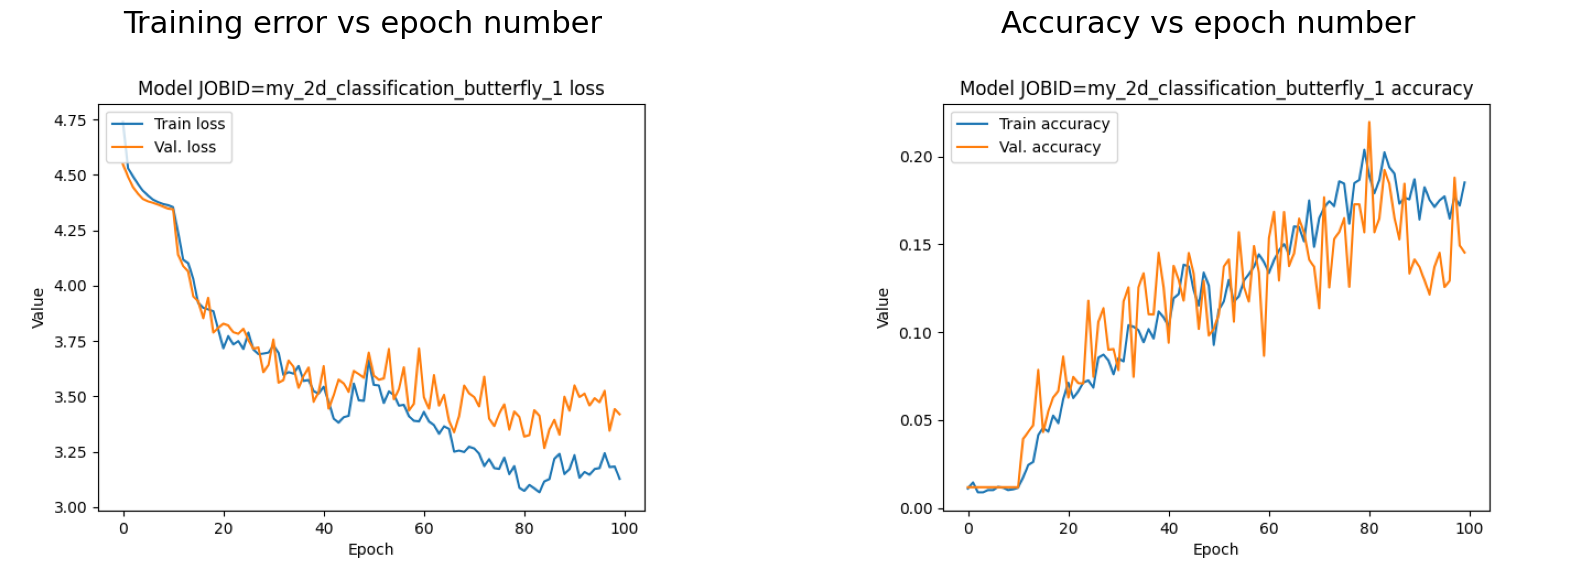

In [ ]:
#@markdown ##Play the cell to show a plot of training error vs. epoch number and accuracy vs epoch number
import matplotlib.pyplot as plt

loss_plot = imread( output_path + '/'+job_name+'/results/'+job_name+'_1/charts/'+job_name+'_1_loss.png' )

iou_plot = imread( output_path + '/'+job_name+'/results/'+job_name+'_1/charts/'+job_name+'_1_accuracy.png' )

fig = plt.figure( figsize = (20,10))
ax1 = plt.subplot( 1, 2, 1 )
_ = plt.imshow( loss_plot )
_ = plt.axis('off')
ax1.set_title( 'Training error vs epoch number', fontdict = {'fontsize':22})

ax2 = plt.subplot( 1, 2, 2 )
_ = plt.imshow( iou_plot )
_ = plt.axis('off')
_= ax2.set_title( 'Accuracy vs epoch number', fontdict = {'fontsize':22})

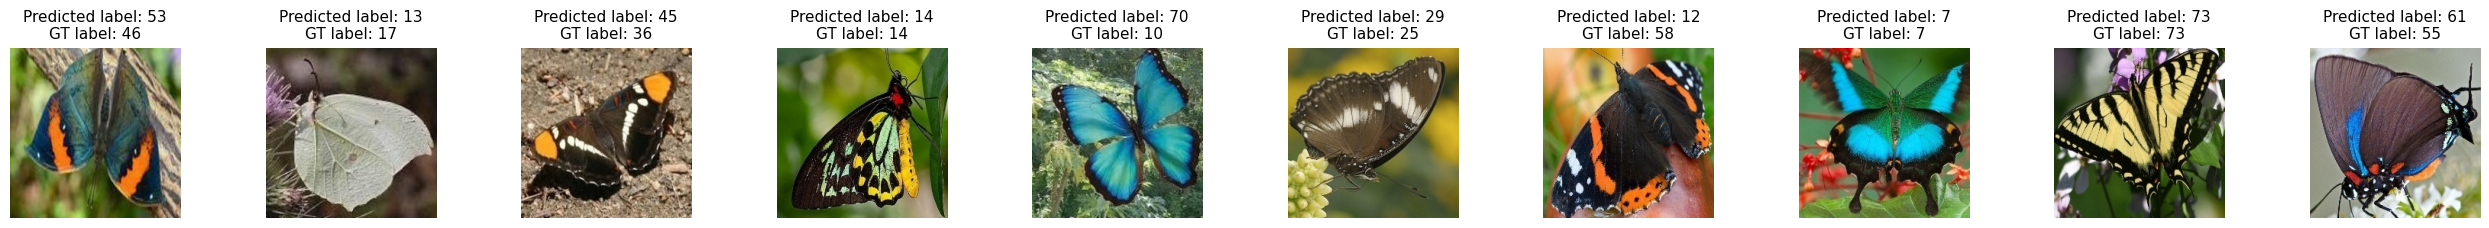

In [ ]:
#@markdown ##Visualize predictions

import pandas as pd
import matplotlib.pyplot as plt
import os

predictions_df = pd.read_csv('/content/output/'+str(job_name)+'/results/'+str(job_name)+'_1/predictions.csv')
#labels = sorted([folder for folder in os.listdir(test_data_path) if os.path.isdir(os.path.join(test_data_path, folder))])

# Reading class names dynamically from folder names
labels = sorted([folder for folder in os.listdir(train_data_path) if os.path.isdir(os.path.join(train_data_path, folder))])

def find_original_class(filename, labels):
    for index, label in enumerate(labels):
        if filename in os.listdir(os.path.join(test_data_path, label)):
            return index
    return None

def display_predictions(predictions_df, labels, num_image):
    random_samples = predictions_df.sample(n=num_image)
    fig = plt.figure(figsize=(25, 25 * num_image))

    for index, (idx, row) in enumerate(random_samples.iterrows()):
        original_class = find_original_class(row['filename'], labels)
        image_path = os.path.join(test_data_path, labels[original_class], row['filename'])
        image = plt.imread(image_path)

        ax = plt.subplot(1, num_image, index + 1)
        if image.shape[-1] == 1 or image.ndim == 2:
            ax.imshow(image, cmap='gray')
        else:
            ax.imshow(image)

        predicted_label_name = row['class']
        original_label_name = original_class

        if test_ground_truth:
            ax.set_title(f"Predicted label: {predicted_label_name}\nGT label: {original_label_name}", fontsize=11)
        else:
            ax.set_title(f"Predicted label: {predicted_label_name}", fontsize=11)

        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

display_predictions(predictions_df, labels, 10)

In [ ]:
#@markdown ###Play to display the path to the output CSV file

final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")

class_results = os.path.join(final_results, "predictions.csv")

print("Output paths:")
print("    Predicted test classes are in {}".format(class_results))

Output paths:
    Predicted test classes are in /content/output/my_2d_classification_butterfly/results/my_2d_classification_butterfly_1/predictions.csv


## **Download classification results**

In [ ]:
#@markdown ###Play to download the CSV file with all classification results in test.

from google.colab import files

files.download(class_results)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Download train model (weights and configuration file)**
If you want to **reuse the train model in the future**, you can download both the model weights and its configuration file (.YAML) by running the following cells.

In [ ]:
from google.colab import files

#@markdown ###Play to download the model weights

checkpoints_path = os.path.join(output_path, job_name, 'checkpoints')

weights_filename = str( job_name ) + '_1-checkpoint-best.pth'

files.download( os.path.join( checkpoints_path, weights_filename))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@markdown ###Play to download the model configuration file (.YAML)

config_path = os.path.join(output_path, job_name, 'config_files')

files.download( os.path.join( config_path, yaml_file))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Export your model to BioImage Model Zoo format:**

If you want to export the model into the [BioImage Model Zoo](https://bioimage.io/#/) format, fill the metadata and run the following cell. After the cell is run a `trained_model_name.bmz.zip` file will be downloaded.

In [ ]:
# ------------- User input ------------
# information about the model
#@markdown ##Introduce the metadata of the model architecture to export the model to BioImage Model Zoo format:
export_bioimage_model_zoo = False #@param {type:"boolean"}
trained_model_name    = "" #@param {type:"string"}
trained_model_authors =  "[First Author, Second Author, Third Author]" #@param {type:"string"}
trained_model_authors_affiliation =  "[First Author Affiliation, Second Author Affiliation, Third Author Affiliation]" #@param {type:"string"}
trained_model_description = "" #@param {type:"string"}
trained_model_license = 'CC-BY-4.0'#@param {type:"string"}
trained_model_references = ["Ronneberger et al. arXiv in 2015",
                            "Franco-Barranco, Daniel, et al. ISBI in 2023"]
trained_model_DOI = ["10.1007/978-3-319-24574-4_28","10.1109/ISBI53787.2023.10230593"] #@param {type:"string"}
trained_model_tags = "modality: electron-microscopy, content: mitochondria" #@param {type:"string"}
trained_model_documentation = "/content/README.md" #@param {type:"string"}


In [ ]:
#@markdown ###Play to download a zip file with your [BioImage Model Zoo](https://bioimage.io/#/) exported model
# update BMZ export parameters
from google.colab import files

if export_bioimage_model_zoo:
    # create the author spec input
    auth_names = trained_model_authors[1:-1].split(",")
    auth_affs = trained_model_authors_affiliation[1:-1].split(",")
    assert len(auth_names) == len(auth_affs)
    authors = [{"name": auth_name, "affiliation": auth_aff} for auth_name, auth_aff in zip(auth_names, auth_affs)]

    # create the citation input spec
    assert len(trained_model_DOI) == len(trained_model_references)
    citations = [{'text': text, 'doi': doi} for text, doi in zip(trained_model_references, trained_model_DOI)]

    tags = [{t.split(":")[0]: t.split(":")[1]} for t in trained_model_tags.split(",")]

    with open(trained_model_documentation, "w") as f:
        f.write("### **Description**\n")
        f.write(f"{trained_model_description}\n\n")
        f.write("This model was created using the [BiaPy library](https://biapyx.github.io/).\n")


    final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")
    bmz_results = os.path.join(final_results, "bmz_model")


    bmz_cfg = {}
    # Description of the model
    bmz_cfg['description'] = trained_model_description 
    # Authors of the model. Need to be a list of dicts, e.g. authors=[{"name": "Gizmo"}]
    bmz_cfg['authors'] = authors
    # License of the model. E.g. "CC-BY-4.0"
    bmz_cfg['license'] = trained_model_license
    # List of dictionaries of citations associated, e.g. [{"text": "Gizmo et al.", "doi": "doi:10.1002/xyzacab123"}]
    bmz_cfg['tags'] = tags
    # Tags to make models more findable on the website, e.g. tags=[{'modality': 'electron-microscopy', 'content': 'mitochondria'}]
    bmz_cfg['cite'] = citations
    # Path to a file with a documentation of the model in markdown, e.g. "my-model/doc.md"
    bmz_cfg['doc'] = trained_model_documentation
    bmz_cfg['build_dir'] = bmz_results
    
    biapy.export_model_to_bmz(bmz_cfg)


    bmz_zip_path = f"/content/{trained_model_name}.bmz.zip"
    if os.path.isdir(bmz_results):
        !zip -r $bmz_zip_path $bmz_results
    else:
        print("The model was not exported to this format")

    files.download(bmz_zip_path)

## **Acknowledgments**
We would like to acknowledge the inspiration provided by the excellent [ZeroCostDL4Mic notebooks](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki). In particular, we have reused some of their descriptions of metrics and parameters.